In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import t
from scipy.stats import ttest_1samp

torch.manual_seed(42)

### One-sample t-tests for mean
- Run tests for $p$ hypotheses
- Bonferroni 
- Holms
- FDR

In [11]:
n = 100        # number of samples
p = 500         # number of features

X = np.random.normal(size = (n, p))
#h0 is true


In [13]:
X[:, 0]

array([ 0.55193815, -1.00142401,  1.40981414, -0.89237331,  0.69662001,
        1.17367433,  0.22157744, -0.05411149, -0.86269606, -0.07536507,
       -0.64736673,  0.38822826, -0.52079356,  1.54541775, -0.18878594,
       -1.15998788,  0.55253359,  1.02848073,  0.13446737, -0.61988376,
       -0.17197835, -0.62717564, -1.01644287,  1.80297341, -1.68651397,
       -0.42102201, -0.69075407,  1.64706112, -0.40212429, -1.03263302,
       -1.15183676,  0.41021715, -0.41996084,  0.32198444, -0.26147149,
        0.93779983,  0.07235774, -0.47317314, -0.91208916, -0.75766212,
        1.05820444,  0.20847109,  0.95597826, -0.23290841, -1.71524568,
        1.08538053,  0.58655669, -0.89150153,  0.08809306,  0.18943154,
       -0.38300518,  2.61178496,  0.44643458,  0.12043007,  0.4929704 ,
       -1.39292567, -0.7015176 , -0.71554056,  0.81501826,  1.6676081 ,
        1.00206032, -0.27672593,  1.36128919, -0.38797232,  0.09440354,
       -0.34562018, -0.8678677 , -0.33823981,  0.92864681,  0.16

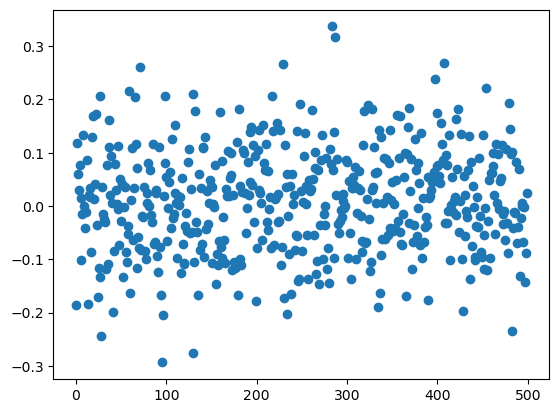

In [3]:
plt.scatter(range(p), X.mean(axis=0))

In [4]:
def ttest_1(x, h0_mean=0):

    df = n-1

    mean = x.mean()
    d = mean - h0_mean
    v = np.var(x)
    denom = np.sqrt(v / n)
    tstat = np.abs(d / denom)
    # xmean - h0_mean / (sqrt(var/n))

    pval = t.cdf(-tstat, df = df) + (1 - t.cdf(tstat, df = df))

    return pval

In [5]:
pvals = np.zeros((p))
for j in range(p):
    pvals[j] = ttest_1samp(X[:, j], 0).pvalue

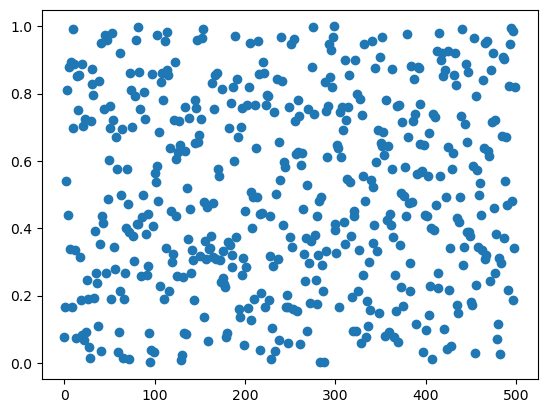

In [6]:
plt.scatter(range(p), pvals)

In [7]:
# no multiple testing correction
# p = 500 (testing 500 hypotheses)
# we expect to reject 500 * 0.05 = 25
alpha  = 0.05
nmp = np.where(pvals < alpha)[0]
print("No multiple testing correction: reject ", nmp.shape[0])

# bonferroni
bf = np.where(pvals < alpha/p)[0]
print("Bonferroni: reject ", bf.shape[0])

# holms
ord_pvals = np.argsort(pvals)
holms = []
for j, s in enumerate(ord_pvals):
    #j = 0, s is index of smallest p-val
    denom = p - j
    if pvals[s] <= (alpha/denom):
        holms.append(s)
    else:
        break
print("Holms: reject ", len(holms))

# FDR, BH procedure # this is different from holms and bonferroni in that 
# we control FDR, not FWER
q = 0.05
bh = []
for j, s in enumerate(ord_pvals):
    val = q * (j + 1) /p # zero indexing
    if pvals[s] <= val:
        bh.append(s)
    else:
        break

print("Benjamini-Hochberg: reject ", len(bh))

No multiple testing correction: reject  22
Bonferroni: reject  0
Holms: reject  0
Benjamini-Hochberg: reject  0


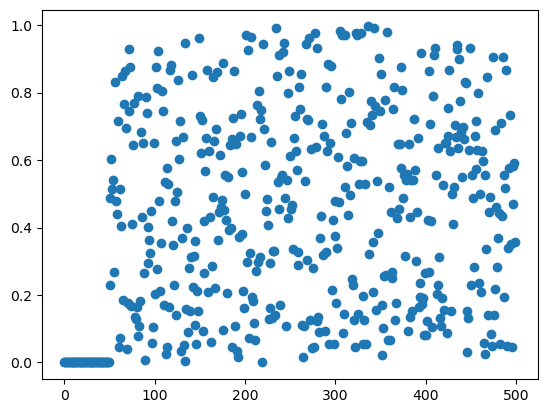

In [14]:
true_mean = np.array([1.0] * int(p/10) + [0] * int(p * 9/10))

X = np.random.normal(size = (n, p))
X = X + true_mean

pvals = np.zeros((p))
for j in range(p):
    pvals[j] = ttest_1samp(X[:, j], 0).pvalue
plt.scatter(range(p), pvals)

In [15]:
print('Number of hypotheses we should reject: ', int(p/10))

# no multiple testing correction
alpha  = 0.05
nmp = np.where(pvals < alpha)[0]
print("No multiple testing correction: reject ", nmp.shape[0])

# bonferroni
bon = np.where(pvals < alpha/p)[0]
print("Bonferroni: reject ", bon.shape[0])

# holms
ord_pvals = np.argsort(pvals)
holms = []
for j, s in enumerate(ord_pvals):
    denom = p - j
    if pvals[s] <= (alpha/denom):
        holms.append(s)
    else:
        break
print("Holms: reject ", len(holms))

# FDR, BH procedure
q = 0.05
bh = []
for j, s in enumerate(ord_pvals):
    val = q * (j + 1) /p # zero indexing
    if pvals[s] <= val:
        bh.append(s)
    else:
        break

print("Benjamini-Hochberg: reject ", len(bh))


Number of hypotheses we should reject:  50
No multiple testing correction: reject  71
Bonferroni: reject  50
Holms: reject  50
Benjamini-Hochberg: reject  52
